# Data analysis

Let's explore and learn more about our data.

In [1]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
processed_data = pd.read_csv("../data/03_Processed/02_ProcessedData.csv")

## Clean data

Below we can see our clean and prepared data. It does significantly differs from the oryginal data pool we had.

In [3]:
processed_data.describe()

,ID,Participation,Programming: R,Programming: Python,Programming: Bash,Version Control: GIT,Containers: Docker,"CLI: (np. Bash, PowerShell, CMD)","Front End: (HTML, JavaScript, CSS)",Databases: SQL,...,Współpraca z administracją UEW,FinTech,HealthTech,FashionTech,E-commerce,SportTech,Non-profit,PropTech (nieruchomości),Cybersecurity,HR
count,59.000000,59.00000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,31.898305,0.59322,1.694915,2.576271,1.542373,2.135593,1.661017,1.593220,1.372881,2.864407,...,1.101695,1.864407,1.576271,1.135593,1.542373,1.254237,1.271186,1.220339,1.355932,0.864407
std,18.630430,0.49545,1.221280,0.747488,0.988242,1.041511,0.957910,1.100449,1.187555,0.681217,...,1.184598,0.955161,0.875005,0.860185,1.055724,0.901975,1.047666,0.929735,0.885958,0.990605
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.500000,0.00000,0.500000,2.000000,1.000000,1.500000,1.000000,1.000000,0.000000,2.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000,0.000000,0.000000,1.000000,0.000000
50%,31.000000,1.00000,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,1.000000,3.000000,...,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,47.500000,1.00000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,67.000000,1.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000


In [4]:
selected_columns = processed_data.iloc[:, 2:]

## Skill measurment

Firstly, we check how points distribute amogst the skill types. Our legend on the visualization clearly states which colour belongs to which level of familarity with the skill. 

/var/folders/g2/yfkj5x354bg2wg_5t6jzg9_80000gn/T/ipykernel_28534/3109922306.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.figure.show()


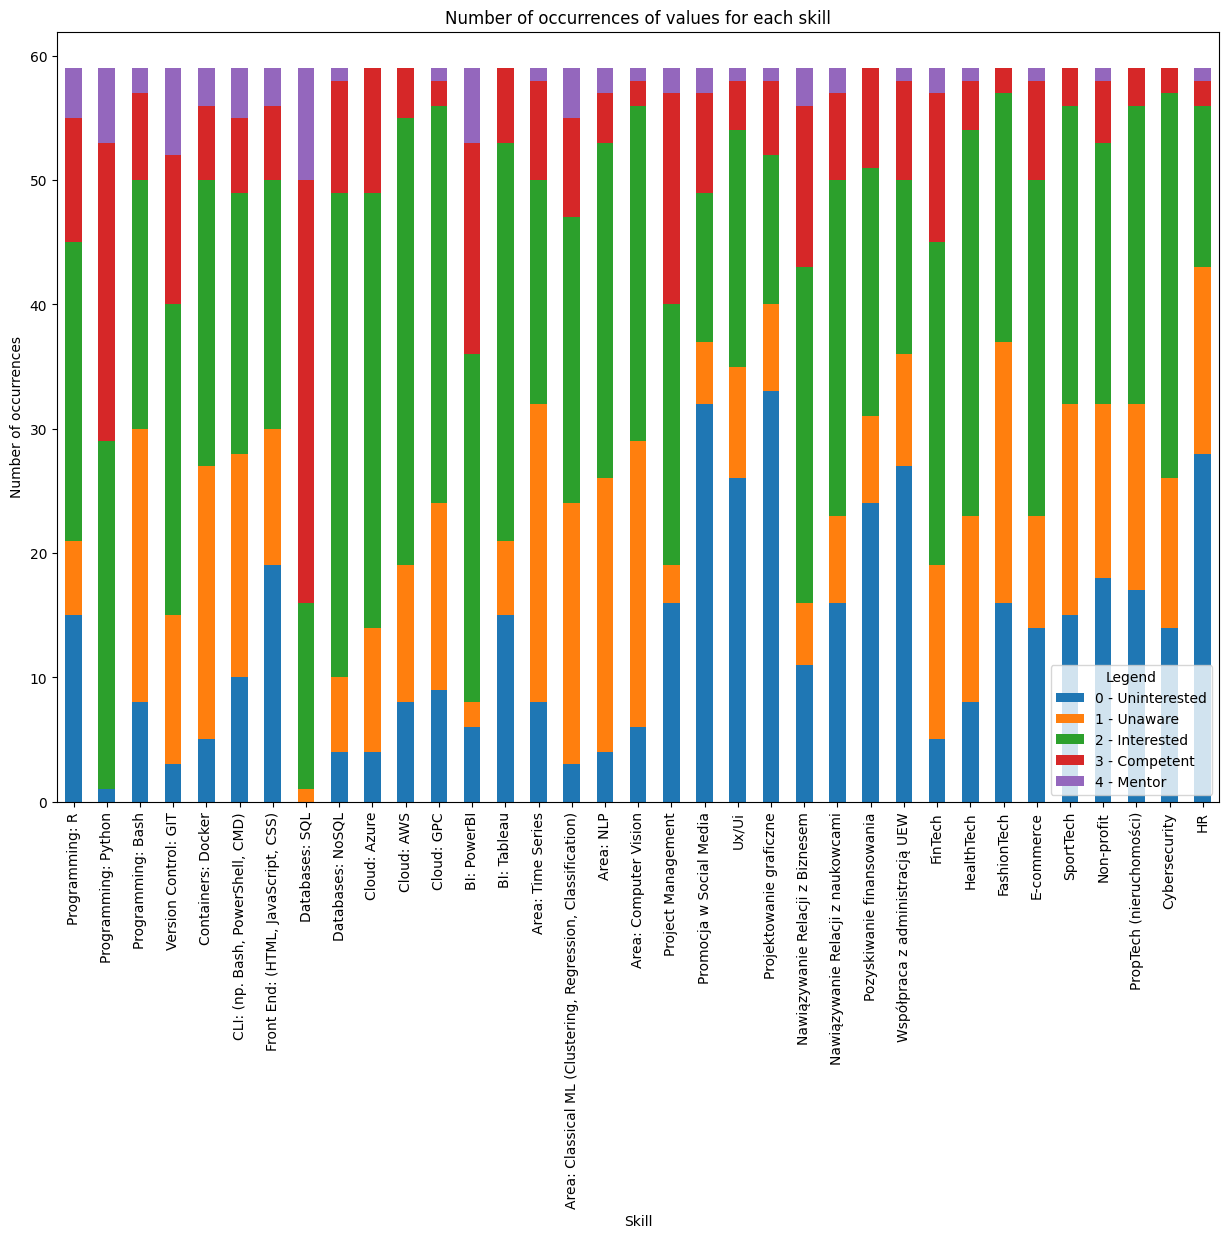

In [5]:
value_counts = selected_columns.apply(lambda x: x.value_counts()).T
ax = value_counts.plot(kind='bar', stacked=True, figsize=(15, 10), title='Number of occurrences of values for each skill')
ax.set_xlabel('Skill')
ax.set_ylabel('Number of occurrences')
legend_labels = ['0 - Uninterested', '1 - Unaware', '2 - Interested', '3 - Competent', '4 - Mentor']
ax.legend(legend_labels, title='Legend')
ax.figure.savefig('../figures/03_NumberOfOccurrences.png', dpi=300,bbox_inches='tight')
ax.figure.show()

We can clearly see the ratio between "mentors" and "interested" students in certain skills.

## Correlation matrix

To check correlation within our data we create a correlation matrix. For cleanles of our documentation we decided to create a triangle type of this specific matrix. Thanks to that we can see which skills have the strongest corellation.

<Figure size 640x480 with 0 Axes>

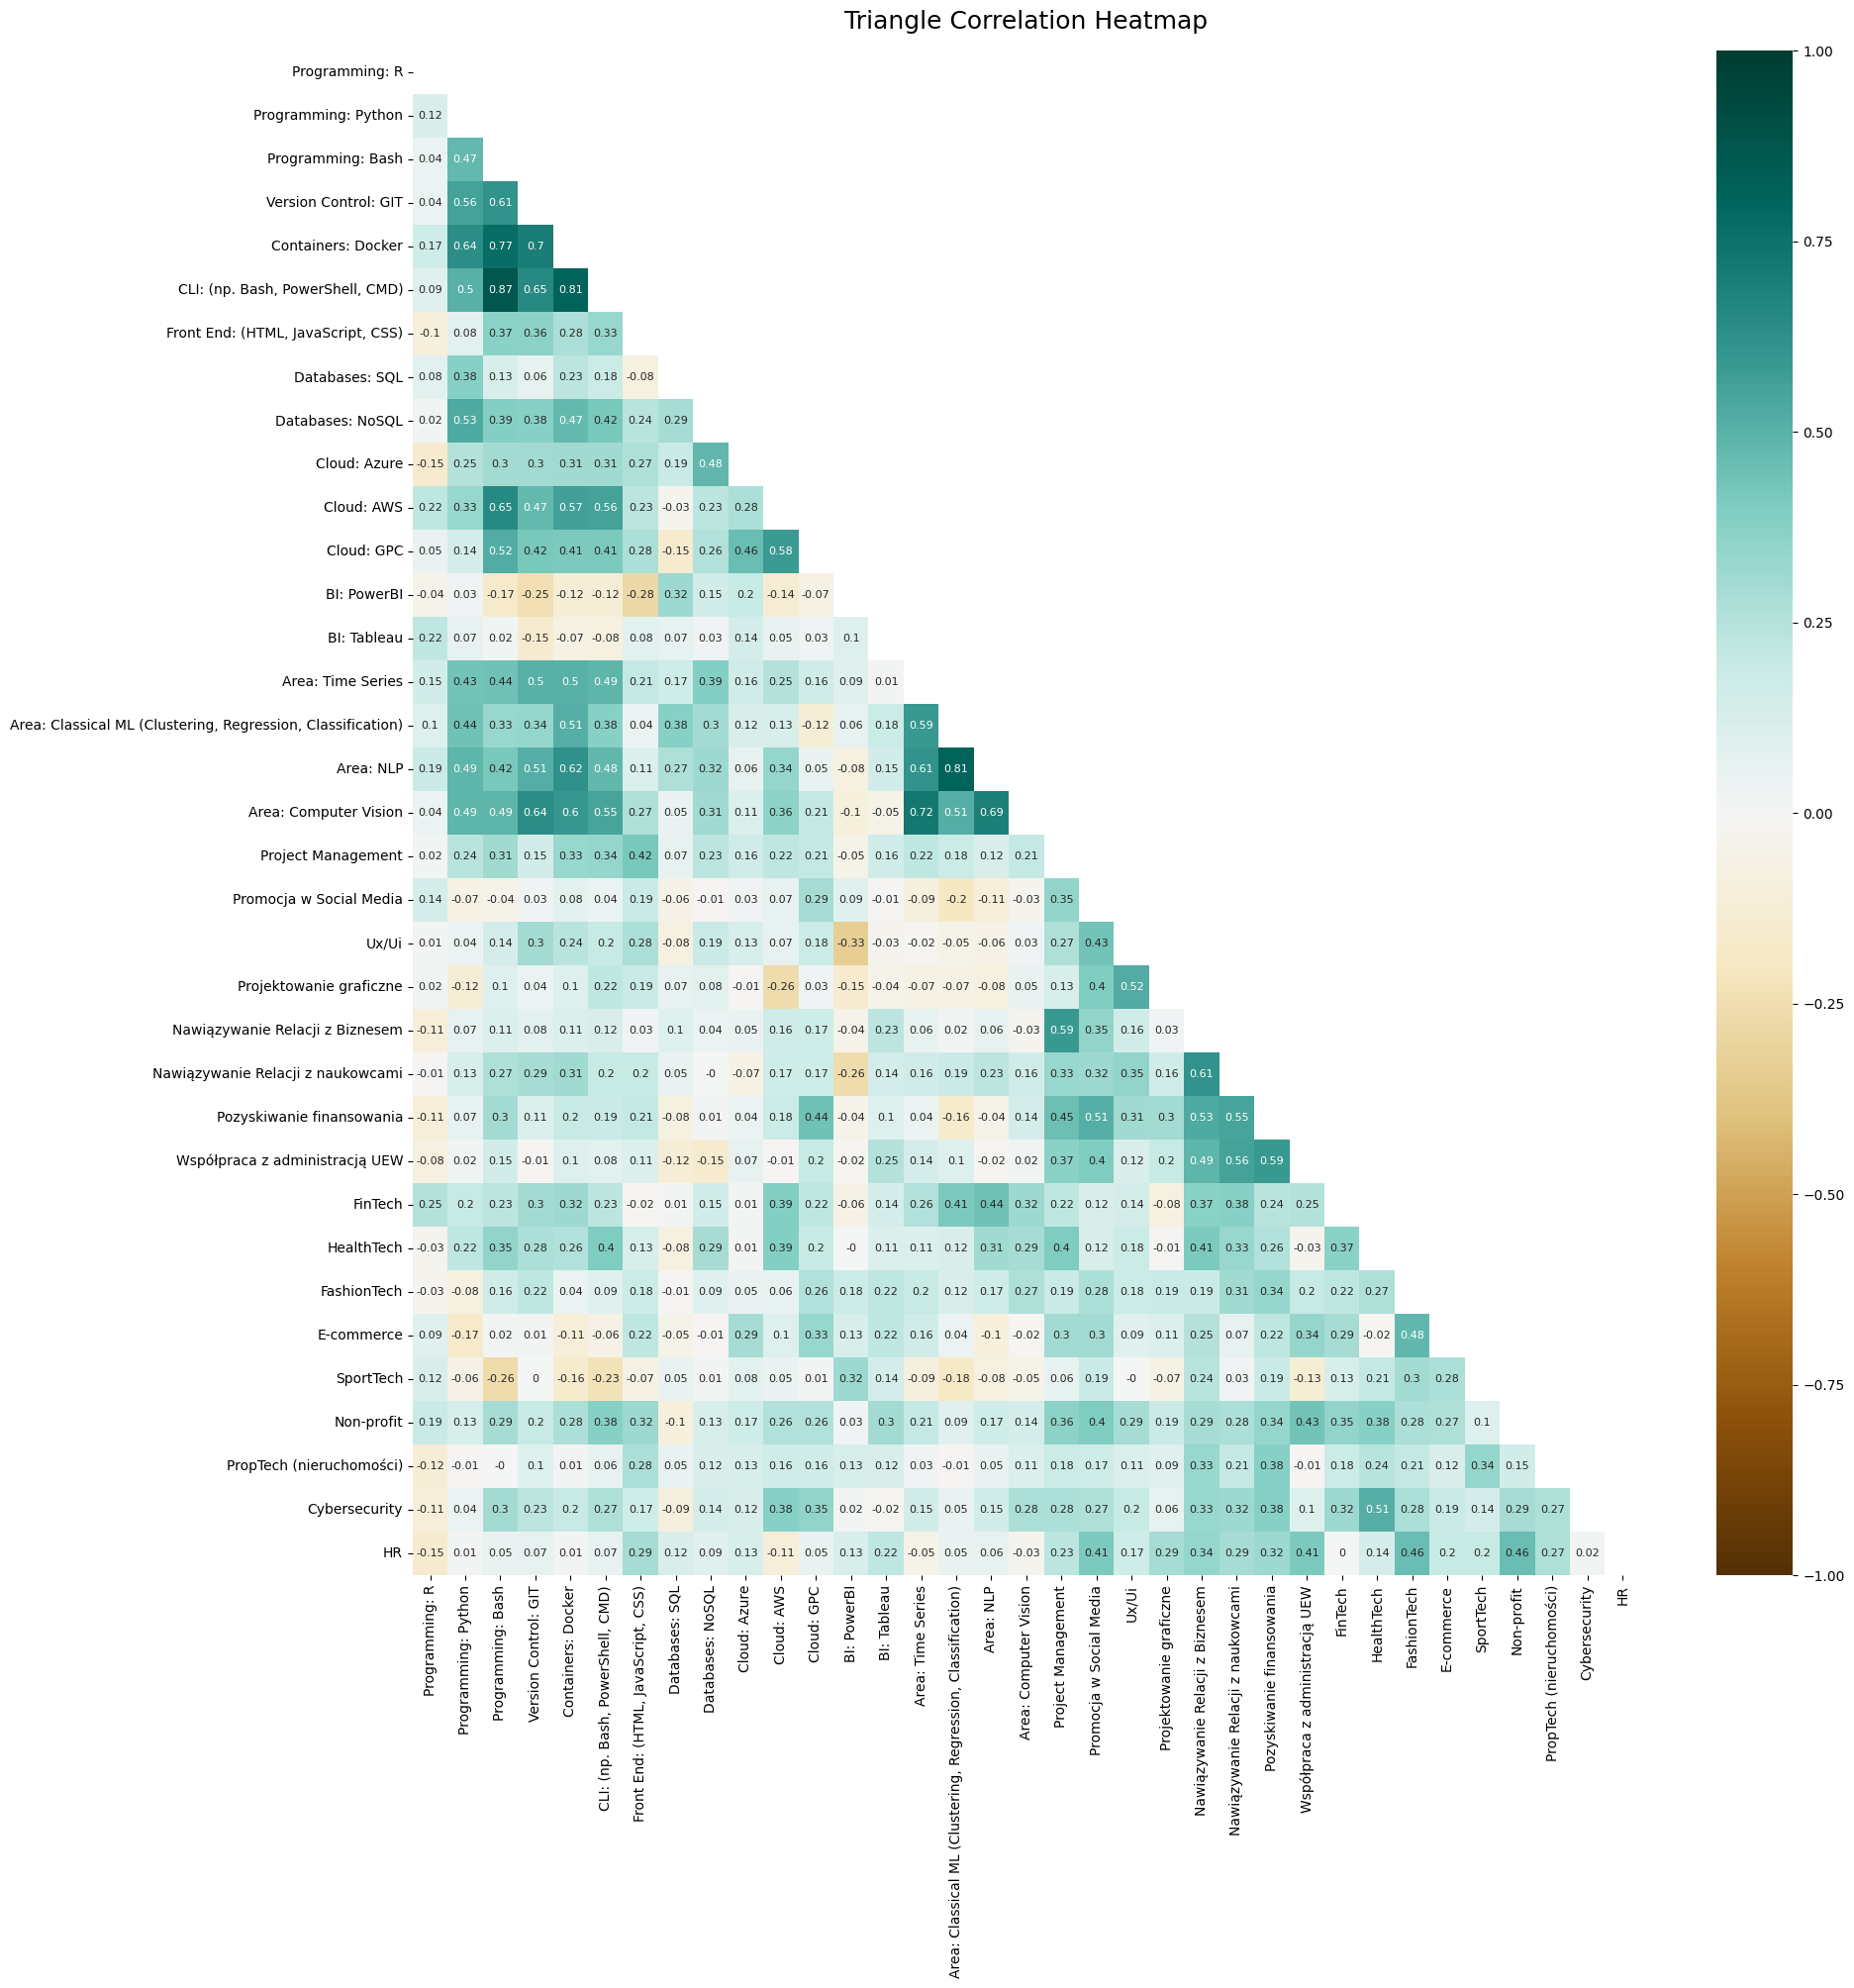

In [6]:
corr_matrix = selected_columns.corr(method='spearman')
corr_matrix=corr_matrix.round(2)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure()
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', annot_kws={"size": 8})
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
plt.savefig('../figures/03_TriangleCorrelationHeatmap.png', dpi=300,bbox_inches='tight')
plt.show()

As we can clearly see, the correlation in our data set is incredibly weak, except for a few pairs of skills.